# Capstone Analytic Report

# American Small Craft Beers

Before Prohibition the United States had 4, 131 breweries most of which were small locally own catering to either to their small town or city.   Prohibition killed off many breweries with only the very large able to stay in business after converting to the manufacture of soda and root beer. 
After the 21st amendment (repeal of Prohibition) was passed only a hand full of companies survived such as Anheuser Bush, Miller and Pabst.  American beer has had a bad reputation throughout the World as being weak and tasting like water.

Since the 1970’s breweries have made a comeback in the United States, with 3,000 now operating varying in size from brew pubs to large industry giants.  In 2012 the United States produced 916 million barrels (23.0 GL or 87 liters) of beer. Interestingly as of 2014 the United States is ranked 17th in the world in annual per capita consumption of beer with 75.8 liters. In comparison, the Czech Republic is ranked first with a per capita consumption of 142.6 liters.

With data obtained from Jean-Nicholos Hould’s Kaggle web page and his dataset of 2410 craft beers I investigated how this resurgence of brewing has had on the type of beers produced and the alcohol content.  

## 1. Analytic Questions

 a) What is the average alcohol by volume for American craft beers?
 
 b) Which states produce the most craft beers?
 
 c) Which types of beers are produced by each region?  Are some types of beers mostly produced in some regions of the United States?
 
  d) Is there an association between those states with the highest beer consumption per capita and where the breweries are located?

## 2. Data Description

Hould’s data is comprised of two CSV files. The first file contains meta-data on the breweries; unique identifier, the name of brewery, city and state of brewery.  The second file contains data on beers produced by breweries in the first file.  
    1. ABV -  Achohol by Volume
    2. IBU - International Bittering Units with 20 - 45 being mild to pronounced hops and those 45 or greater are   heavily hopped.
    3. Brewery ID – Unique identify tying the beer back to the brewery
    4. Name – Name of the beer produced
    5. Style – Type of beer (i.e., IPA, Lager)
    6. Ounces – The number of oz contained in can for the type of beer

The data was scrapped by Jean-Nicholos Hould web scrapper from the site http://craftcans.com/db.php?search=all&sort=beerid&ord=desc&view=text.   He wrote a blog about the details of the scrapping process which can be accessed from the reference section. 

Having moved recently from the East coast to the Midwest one of first things I noticed was the number of breweries and the prevalence of beer drinking over wine and liquor.  The number and popularity of craft beers seemed to have taken off in late 90’s and 2000s.  Alcohol consumption has been an  important aspect of American Cultural History and the investigate into the current state of American craft beers is interesting. 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

%matplotlib inline

In [35]:
beer_df = pd.read_csv('beers.csv')

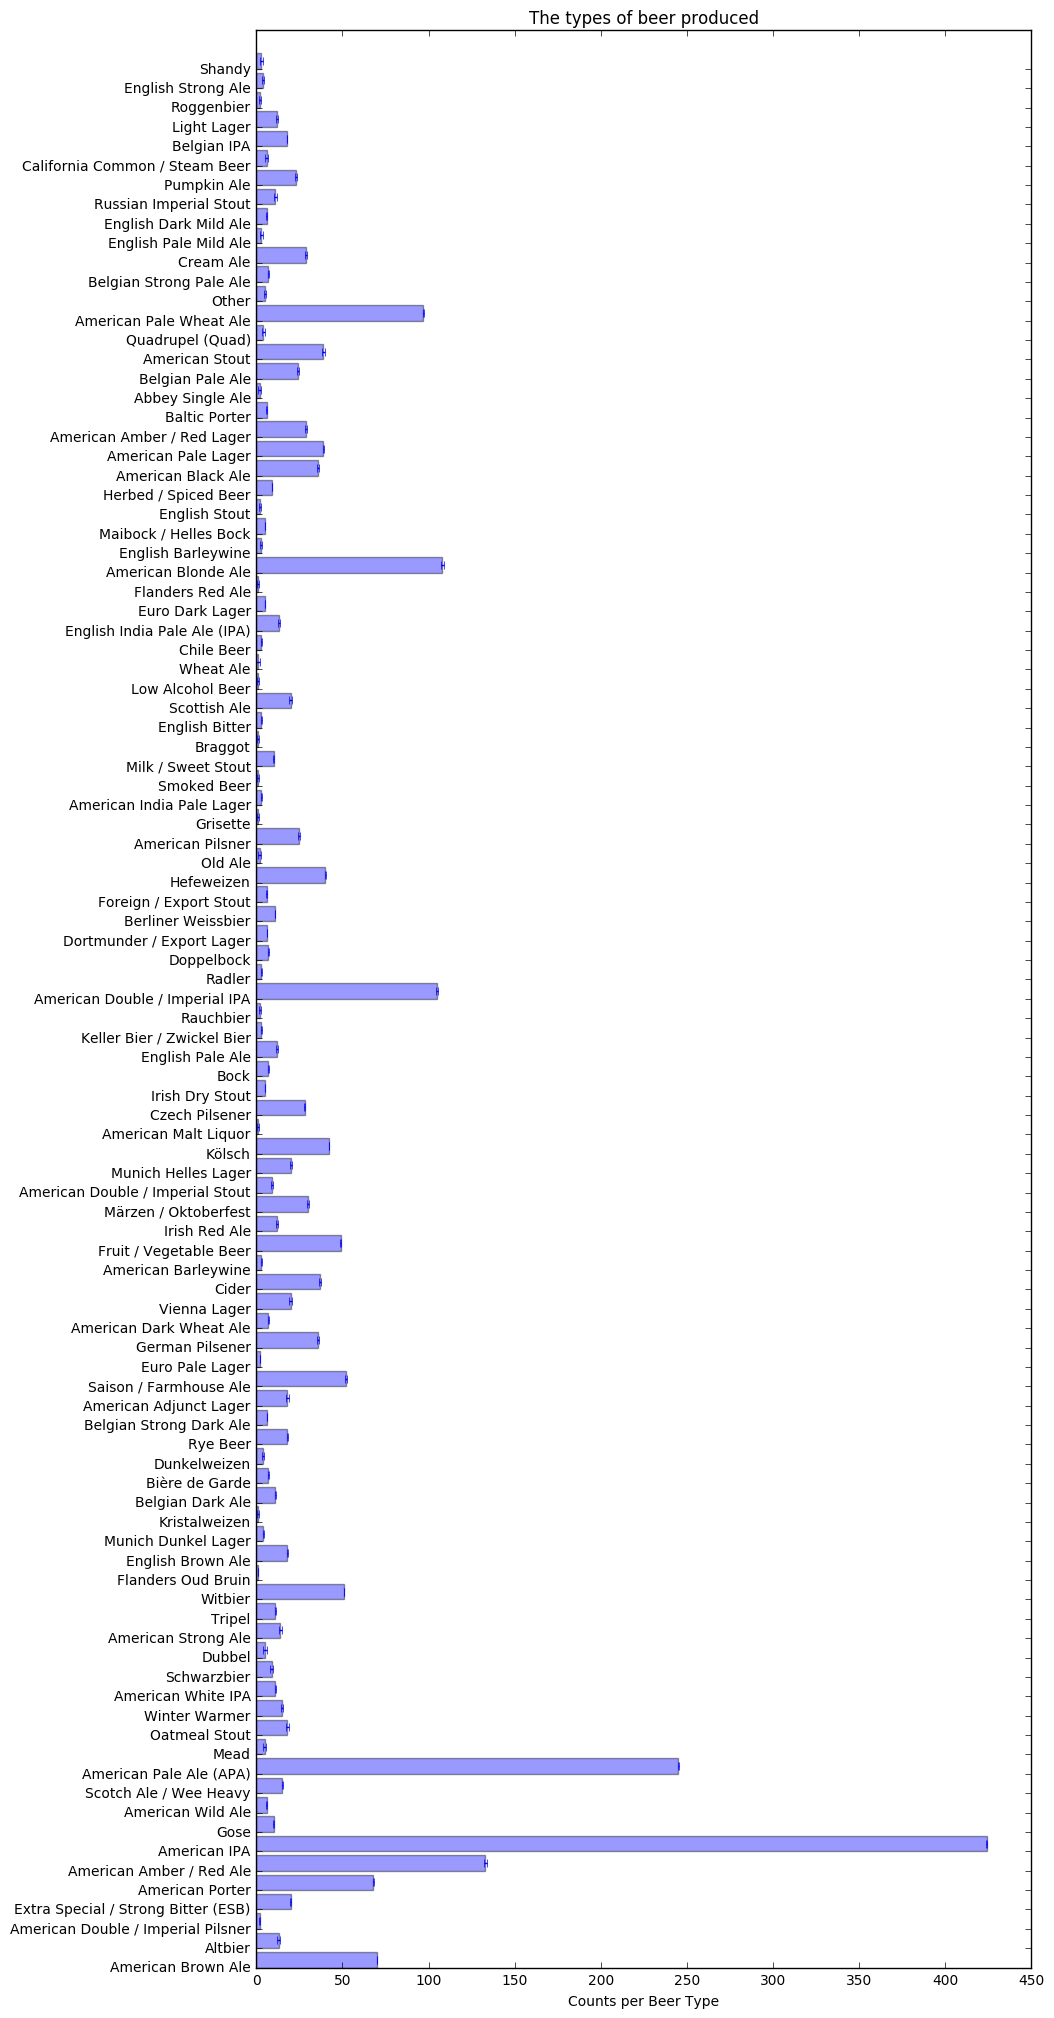

The 5 most common types of beers are :

American IPA                     : 424
American Pale Ale (APA)          : 245
American Amber / Red Ale         : 133
American Blonde Ale              : 108
American Double / Imperial IPA   : 105


In [40]:
beer_types = Counter(beer_df['style'])
types_count = beer_types.most_common(30)
keys = beer_types.keys()

y_pos = np.arange(len(keys))
types = [beer_types[k] for k in keys]
error = np.random.rand(len(keys))
plt.figure(figsize=(10,25))
plt.barh(y_pos, types, xerr=error, alpha=0.4)
plt.yticks(y_pos, keys)
plt.xlabel('Counts per Beer Type')
plt.title('The types of beer produced')
plt.show()

print('The 5 most common types of beers are :\n')
result = beer_types.most_common(5)
for item in result:
    print('{:32s} : {:3d}'.format(item[0], item[1]))

###  What is the average alcohol by volume for American craft beers?

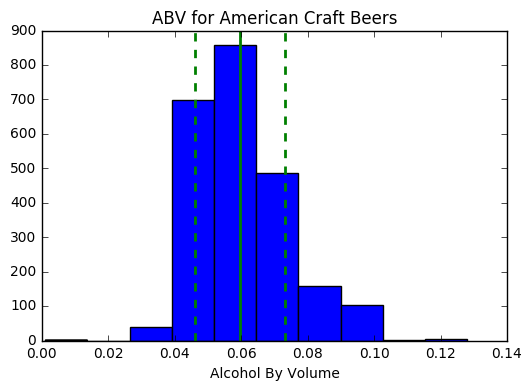

mean               : 0.059773
standard deviation : 0.013542


In [47]:
mean = sum(beer_df['abv'].dropna())/len(beer_df['abv'].dropna())
sd = np.std(beer_df['abv'].dropna(), ddof=1)
plt.hist(beer_df['abv'].dropna())
plt.axvline(mean, color='g', linestyle='solid', linewidth=2)
plt.axvline(mean + sd, color='g', linestyle='dashed', linewidth=2)
plt.axvline(mean - sd, color='g', linestyle='dashed', linewidth=2)
plt.xlabel('Alcohol By Volume')
plt.title('ABV for American Craft Beers')
plt.show()
print('{:18s} : {:3f}'.format('mean', mean))
print('{:18s} : {:3f}'.format('standard deviation', sd))

The average ABV for the craft beers is 6 %. Considering that most of the beer types in the dataset are IPA’s this is not surprising. The ABV of a beer is largely a function of how the beer is brewed or the type of beer. IPA's can have ABV within the range 4.0 to 6.5 %.  For comparison Budweiser and Miller Lites alcohol by volume is 5.0 and 4.2 percent. 

###  Which states produce the most craft beers?

## References

https://www.brewersassociation.org/brewers-association/history/history-of-craft-beer/

https://en.wikipedia.org/wiki/Beer_in_the_United_States

https://www.kaggle.com/nickhould/craft-cans

https://en.wikipedia.org/wiki/List_of_countries_by_beer_consumption_per_capita

http://www.jeannicholashould.com/python-web-scraping-tutorial-for-craft-beers.html
